In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)

<module 'tools' from '/home/ivan/AFM/Instanton/tools.py'>

In [2]:
importlib.reload(tools)
eps_rho=0.8
eps_norm=0.8
eps_action=eps_norm
rho=3.745091
norm=0.744
norm_action=norm
size_local=5
neigh=1
#file="../runns6nt45b2.7nr45/t3.1/profile4dt3.1c528to.dat"

#file_top="../Smooth/45x6/profile4dt0c5to.dat"
#file_act="../Smooth/45x6/profile4dt0c5en.dat"
#file_top="../Smooth/45x6_georg/6288/profile4dt4c0to.dat"
#file_act="../Smooth/45x6_georg/6288/profile4dt4c0en.dat"
#file="../Smooth/45x6_georg/profile4dt16c0to.dat"

file_top="../Smooth/45x6/profile4dt0c5to.dat"
file_act=file_top

#file_top="../dataprofiles50/profile4dt50c560to.dat"
#file_act=file_top

#file_top="../runns6nt45b2.7nr45/t3.9/profile4dt3.1c432to.dat"
#file_top="../runns6nt45b2.7nr45/t3.9/profile4dt3.1c432to.dat"


top_density,sizes=tools.read_top(file_top)
act_density,sizes=tools.read_top(file_act)

density_2d_top,sizes_big,index_smal=tools.projection_2d(top_density,sizes)
density_2d_act,sizes_big,index_smal=tools.projection_2d(act_density,sizes)


inst, a_inst, frac, a_frac, t_frac, t_inst, total=tools.find_inst_2d(density_2d_top,
                        density_2d_act,sizes_big,rho,norm,norm_action,eps_rho,eps_norm,eps_action,neigh)

#tools.plot_dens_2d(file_top,density_2d_top,sizes_big,t_frac)
#tools.plot_dens_2d(file_act,density_2d_act,sizes_big,t_frac)

In [3]:
print(sizes)

[ 6  6 45 45]


In [12]:
frac[0][2]

array([22.95211659, 22.56476694,  3.74509179,  0.74464495])

In [5]:
def inst_plot(position,maxima_x,maxima_y,rho,norm):
    #maxim=[23,23]
    return(norm/(5*2*np.pi*np.pi/(16*rho**3))*(rho/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

In [6]:
x=[]
y=[]
data=[]
neigh=1
maxima=frac[0]
for i in range(-neigh,neigh+1):
    for j in range(-neigh,neigh+1):
        x=(int(maxima[0])+i)%sizes_big[0]
        y=(int(maxima[1])+j)%sizes_big[1]
        data.append([x,y,density_2d_top[x,y]])
data=np.array(data)

In [7]:
if density_2d_top[maxima[0],maxima[1]]<0:
    density_2d_top=-density_2d_top
popt=tools.fit_inst(density_2d_top,maxima,neigh,sizes_big)

In [8]:
rho_templ=3.745091
norm_templ=0.744
print([i,j],popt[0],popt[1],popt[2],popt[3])

[1, 1] 22.952116590096544 22.564766940164628 3.7450917948058873 0.7446449545732993


In [9]:
rho_templ=3.745091
norm_templ=0.744
print([i,j],popt[0],popt[1],popt[2],popt[3])

[1, 1] 22.952116590096544 22.564766940164628 3.7450917948058873 0.7446449545732993


In [10]:
data_plot=np.zeros((sizes_big[0],sizes_big[1]))
for i in range(0,sizes_big[0]):
    for j in range(0,sizes_big[1]):
        data_plot[i,j]=inst_plot([i,j],popt[0],popt[1],popt[2],popt[3])

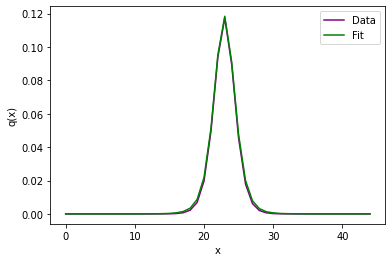

In [122]:
data_plot_1d=data_plot.sum(axis=1)
density_1d=density_2d_top.sum(axis=1)

plt.xlabel("x")
plt.ylabel("q(x)")

plt.plot(density_1d, color="purple", label="Data")
plt.plot(data_plot_1d, color="green", 
         label="Fit")
plt.legend(loc="upper right")

plt.savefig("Smooth_45x6_fit.png", dpi=150)